<a href="https://colab.research.google.com/github/joshuaghannan/ECEC247_Project/blob/jgh_tests/Dataset_Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
########################################################
# If running with Google Colab

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [16]:
########################################################
# If running with Google Colab
# Create a folder "C247/FinalProject/project_data" and then store the project datasets within that folder
# Check that your datasets are setup correctly

!ls "/content/gdrive/My Drive/C247/FinalProject/project_data" # File path

Dataset_Tests.ipynb		   person_test.npy	      X_test.npy
EEG_loading.ipynb		   person_train_valid.npy     y_test.npy
Loading_Files_Setting_Up_TF.ipynb  PyTorch_Experiments.ipynb  y_train_valid.npy


In [0]:
import numpy as np
import matplotlib.pyplot as plt


### Load the Datasets

The **actual dataset** has **2115 trials**; each trial has corresponding EEG data from **22 electrodes** over **1000 time bins**. \\

The original data set consists of EEG data from **9 subjects**. \\
**4 classes**: the imagination of movement of the left hand (class 1), right hand (class 2), both feet (class 3), and tongue (class 4). \\
Two sessions on different days were recorded for each subject. \\
Each session is comprised of 6 runs separated by short breaks. \\
One run consists of 48 trials (12 for each of the four possible classes), yielding a total of 288 trials per session. \\
So we have a total of **576 trials** over two days for each of the **9 subjects**, identically distributed between the **4 classes**. \\

In [0]:
# X_test = np.load("X_test.npy")
# y_test = np.load("y_test.npy")
# person_train_valid = np.load("person_train_valid.npy")
# X_train_valid = np.load("X_train_valid.npy")
# y_train_valid = np.load("y_train_valid.npy")
# person_test = np.load("person_test.npy")

# Change if your directory is different
dataset_path = "/content/gdrive/My Drive/C247/FinalProject/project_data/" 

X_test = np.load(dataset_path + "X_test.npy")
y_test = np.load(dataset_path + "y_test.npy")
person_train_valid = np.load(dataset_path + "person_train_valid.npy")
X_train_valid = np.load(dataset_path + "X_train_valid.npy")
y_train_valid = np.load(dataset_path + "y_train_valid.npy")
person_test = np.load(dataset_path + "person_test.npy")

### Shape of the Data

In [21]:
print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))

Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


The **actual dataset** has **2115 trials**; each trial has corresponding EEG data from **22 electrodes** over **1000 time bins**. A trial is one imagination of movement. \\

In [70]:
classes = {
  769 : 1, #Cue onset left
  770 : 2, #Cue onset right
  771 : 3, #Cue onset foot
  772 : 4  #Cue onset tongue
}

print(classes[771])

3


Text(0, 0.5, 'Electrode Data')

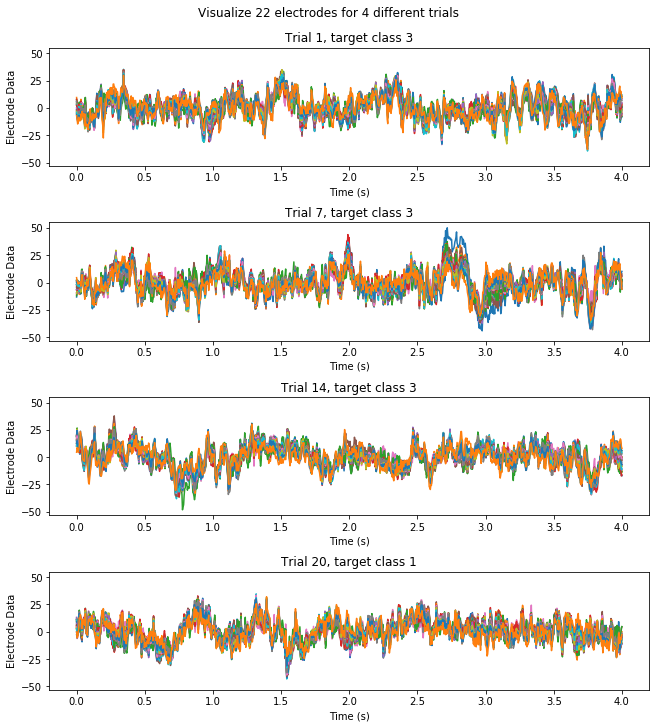

In [88]:
X_train_valid[0,:,:].shape
time = np.linspace(0, 4, num=1000)

fig, axs = plt.subplots(4,1, figsize=(9,10), sharey=True, constrained_layout=True)
for i in range(22):
  axs[0].plot(time,X_train_valid[0,i,:])
  axs[1].plot(time,X_train_valid[6,i,:])
  axs[2].plot(time,X_train_valid[13,i,:])
  axs[3].plot(time,X_train_valid[19,i,:])

fig.suptitle("Visualize 22 electrodes for 4 different trials")
axs[0].set_title("Trial 1, target class {}".format(classes[y_train_valid[0]]))
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Electrode Data')
axs[1].set_title("Trial 7, target class {}".format(classes[y_train_valid[6]]))
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Electrode Data')
axs[2].set_title("Trial 14, target class {}".format(classes[y_train_valid[13]]))
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Electrode Data')
axs[3].set_title("Trial 20, target class {}".format(classes[y_train_valid[19]]))
axs[3].set_xlabel('Time (s)')
axs[3].set_ylabel('Electrode Data')


Text(0, 0.5, 'Electrode Data')

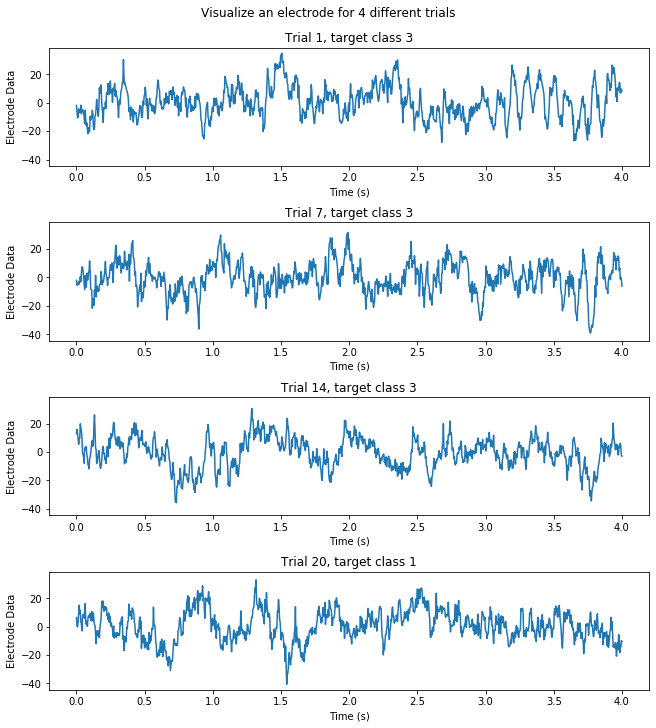

In [92]:
X_train_valid[0,:,:].shape
time = np.linspace(0, 4, num=1000)

fig, axs = plt.subplots(4,1, figsize=(9,10), sharey=True, constrained_layout=True)
#for i in range(10):
axs[0].plot(time,X_train_valid[0,15,:])
axs[1].plot(time,X_train_valid[6,15,:])
axs[2].plot(time,X_train_valid[13,15,:])
axs[3].plot(time,X_train_valid[19,15,:])

fig.suptitle("Visualize an electrode for 4 different trials")
axs[0].set_title("Trial 1, target class {}".format(classes[y_train_valid[0]]))
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Electrode Data')
axs[1].set_title("Trial 7, target class {}".format(classes[y_train_valid[6]]))
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Electrode Data')
axs[2].set_title("Trial 14, target class {}".format(classes[y_train_valid[13]]))
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Electrode Data')
axs[3].set_title("Trial 20, target class {}".format(classes[y_train_valid[19]]))
axs[3].set_xlabel('Time (s)')
axs[3].set_ylabel('Electrode Data')


Split training data

In [110]:
even = np.arange(500)*2
odd = np.arange(500)*2 +1
print(odd[490:500])
X_train_even = X_train_valid[:,:,even]
X_train_odd = X_train_valid[:,:,odd]
print(X_train_even.shape)

[981 983 985 987 989 991 993 995 997 999]
(2115, 22, 500)


Text(0, 0.5, 'Electrode Data')

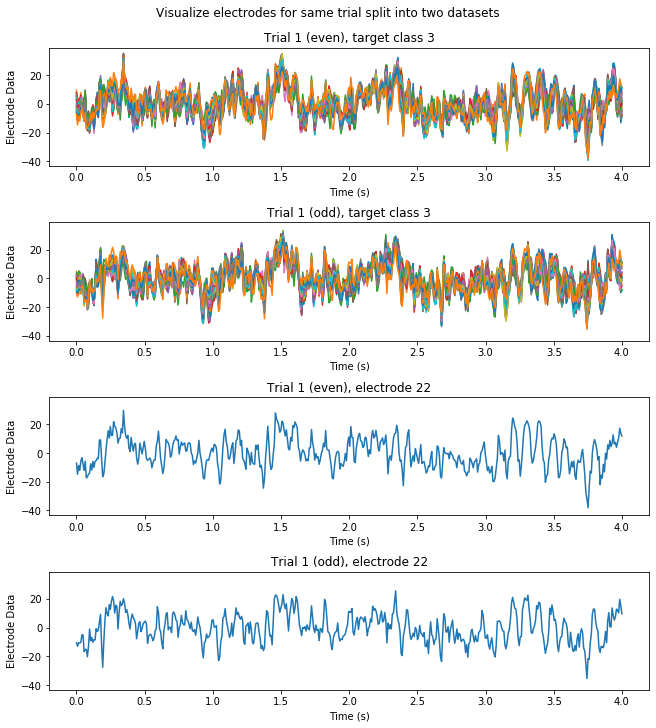

In [115]:
X_train_valid[0,:,:].shape
time = np.linspace(0, 4, num=500)

fig, axs = plt.subplots(4,1, figsize=(9,10), sharey=True, constrained_layout=True)
for i in range(22):
  axs[0].plot(time,X_train_even[0,i,:])
  axs[1].plot(time,X_train_odd[0,i,:])
axs[2].plot(time,X_train_even[0,21,:])
axs[3].plot(time,X_train_odd[0,21,:])
fig.suptitle("Visualize electrodes for same trial split into two datasets")
axs[0].set_title("Trial 1 (even), target class {}".format(classes[y_train_valid[0]]))
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Electrode Data')
axs[1].set_title("Trial 1 (odd), target class {}".format(classes[y_train_valid[0]]))
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Electrode Data')
axs[2].set_title("Trial 1 (even), electrode 22")
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Electrode Data')
axs[3].set_title("Trial 1 (odd), electrode 22")
axs[3].set_xlabel('Time (s)')
axs[3].set_ylabel('Electrode Data')